# Getting started for the AML 2023/2024 Egocentric Vision Project

<a href="https://colab.research.google.com/github/EgovisionPolito/aml23-ego/blob/master/colab_runner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading the code

In [7]:
# Installing missing dependencies
# !pip install omegaconf coloredlogs wandb

## EPIC-Kitchens-55 dataset

**READ carefully!**

To develop the project, you need to download the RGB frames for a subset of EPIC-Kitchens-55 (participants P08, P01 and P22) from [here](https://drive.google.com/drive/u/1/folders/1dJOtZ07WovP3YSCRAnU0E4gsfqDzpMVo). 

You also need to the pretrained checkpoints for each domain from [here](https://politoit-my.sharepoint.com/:f:/g/personal/simone_peirone_polito_it/ErdsZhvmR65Lun5_5O0-l5sBTPjCCZZq2f700Tj_CNzjTQ?e=L1yflf).

Add the Google Drive directory containing the dataset to your Google Drive or upload the dataset on your Google Drive to access it from Google Colab.

**NOTE**: As the dataset is quite heavy, we stronly suggest you to implement and test all your code on one for the three dataset. Then, once you are sure everything works, repeat the experiments on the remaining two datasets.

## Features extraction

### Dense test

In [4]:
%%bash

python.exe save_feat.py name=dense_5 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=test \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=5 \
  save.dense_sampling.RGB=True

python.exe save_feat.py name=dense_10 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=test \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=10 \
  save.dense_sampling.RGB=True

python.exe save_feat.py name=dense_16 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=test \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=16 \
  save.dense_sampling.RGB=True
  
python.exe save_feat.py name=dense_25 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=test \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=25 \
  save.dense_sampling.RGB=True

# python.exe save_feat.py name=uniform_25 config=configs/I3D_save_feat.yaml dataset.shift=D1-D1 dataset.RGB.data_path=../ek_data/frames split=test dataset.workers=0 save.num_frames_per_clip.RGB=25 save.dense_sampling.RGB=False
# If everything is working, you should expect an error message telling you to implement the '_get_val_indices' method in the dataset class.
# Once you have implemented it, you should run the script for the train and test split of the dataset to extract the features.

2024-02-28 10:37:35 LOG INFO Feature Extraction
2024-02-28 10:37:35 LOG INFO Running with parameters: 
  action: save
  name: dense_5
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: ./saved_models/I3D_SourceOnlyD1
  logname: save_D1-D1.log
  models_dir: saved_models\dense_5\Feb28_10-37-30
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 1
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  dataset:
    annotations_path: train_val
    shift: D1-D1
    workers: 0
    stride: 2
    resolution: 224
    RGB:
      data_path: ../ek_data/frames
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: I3D
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay

### Dense train

In [ ]:
%%bash

python.exe save_feat.py name=dense_5 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=train \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=5 \
  save.dense_sampling.RGB=True
  
python.exe save_feat.py name=dense_10 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=train \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=10 \
  save.dense_sampling.RGB=True

python.exe save_feat.py name=dense_16 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=train \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=16 \
  save.dense_sampling.RGB=True
  
python.exe save_feat.py name=dense_25 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=train \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=25 \
  save.dense_sampling.RGB=True

### Uniform test

In [ ]:
%%bash

python.exe save_feat.py name=uniform_5 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=test \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=5 \
  save.dense_sampling.RGB=False
  
python.exe save_feat.py name=uniform_10 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=test \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=10 \
  save.dense_sampling.RGB=False

python.exe save_feat.py name=uniform_16 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=test \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=16 \
  save.dense_sampling.RGB=False
  
python.exe save_feat.py name=uniform_25 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=test \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=25 \
  save.dense_sampling.RGB=False

### Uniform train

In [ ]:
%%bash

python.exe save_feat.py name=uniform_5 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=train \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=5 \
  save.dense_sampling.RGB=False
  
python.exe save_feat.py name=uniform_10 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=train \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=10 \
  save.dense_sampling.RGB=False

python.exe save_feat.py name=uniform_16 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=train \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=16 \
  save.dense_sampling.RGB=False
  
python.exe save_feat.py name=uniform_25 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames \
  split=train \
  dataset.workers=0 \
  save.num_frames_per_clip.RGB=25 \
  save.dense_sampling.RGB=False

# Plot features

In [16]:
%%bash

python.exe plot_features.py \
    use_frames=False \
    features_path='saved_features/dense_5_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/dense_5_test_woim.png' \
    plot_3D=False && 
    
python.exe plot_features.py \
    use_frames=False \
    features_path='saved_features/dense_10_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/dense_10_test_woim.png' \
    plot_3D=False &&
    
python.exe plot_features.py \
    use_frames=False \
    features_path='saved_features/dense_16_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/dense_16_test_woim.png' \
    plot_3D=False &&
    
python.exe plot_features.py \
    use_frames=False \
    features_path='saved_features/dense_25_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/dense_25_test_woim.png' \
    plot_3D=False &&
    
python.exe plot_features.py \
    use_frames=True \
    features_path='saved_features/dense_5_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/dense_5_test_woim.png' \
    plot_3D=False &&
    
python.exe plot_features.py \
    use_frames=True \
    features_path='saved_features/dense_10_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/dense_10_test_woim.png' \
    plot_3D=False &&
    
python.exe plot_features.py \
    use_frames=True \
    features_path='saved_features/dense_16_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/dense_16_test_woim.png' \
    plot_3D=False &&
    
python.exe plot_features.py \
    use_frames=True \
    features_path='saved_features/dense_25_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/dense_25_test_woim.png' \
    plot_3D=False &&
    
python.exe plot_features.py \
    use_frames=False \
    features_path='saved_features/uniform_5_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/uniform_5_test_woim.png' \
    plot_3D=False &&
    
python.exe plot_features.py \
    use_frames=False \
    features_path='saved_features/uniform_10_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/uniform_10_test_woim.png' \
    plot_3D=False &&
    
python.exe plot_features.py \
    use_frames=False \
    features_path='saved_features/uniform_16_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/uniform_16_test_woim.png' \
    plot_3D=False &&
    
python.exe plot_features.py \
    use_frames=False \
    features_path='saved_features/uniform_25_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/uniform_25_test_woim.png' \
    plot_3D=False &&
    
python.exe plot_features.py \
    use_frames=True \
    features_path='saved_features/uniform_5_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/uniform_5_test_woim.png' \
    plot_3D=False &&
    
python.exe plot_features.py \
    use_frames=True \
    features_path='saved_features/uniform_10_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/uniform_10_test_woim.png' \
    plot_3D=False &&
    
python.exe plot_features.py \
    use_frames=True \
    features_path='saved_features/uniform_16_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/uniform_16_test_woim.png' \
    plot_3D=False &&
    
python.exe plot_features.py \
    use_frames=True \
    features_path='saved_features/uniform_25_D1_test.pkl' \
    split_path='train_val/D1_test.pkl' \
    output_image_path='plots/uniform/uniform_25_test_woim.png' \
    plot_3D=False

{'use_frames': False, 'features_path': 'saved_features/uniform_5_D1_test.pkl', 'split_path': 'train_val/D1_test.pkl', 'output_image_path': 'plots/uniform/uniform_5_test_woim.png', 'plot_3D': False}


B:\Programmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
B:\Programmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Figure(640x480)


# Training

In [1]:
%%bash

python.exe train_classifier.py \
    name=test_train \
    dataset.shift=D1-D1 \
    dataset.RGB.data_path=../ek_data/frames \
    dataset.RGB.features_name=SAVE_DENSE-extracted \
    dataset.workers=0 \
    # config=configs/I3D_save_feat.yaml \
    # action=train \
    # split=train \
        
# Linear with pooling
python.exe train_classifier.py name=test_train_LWP dataset.shift=D1-D1 dataset.RGB.data_path=../ek_data/frames dataset.RGB.features_name=dense_5 dataset.workers=0 models.RGB.model=LWP
# Linear with convolution
python.exe train_classifier.py name=test_train_LWC dataset.shift=D1-D1 dataset.RGB.data_path=../ek_data/frames dataset.RGB.features_name=dense_5 dataset.workers=0 models.RGB.model=LWC
# LSTM
python.exe train_classifier.py name=test_train_LSTMC_WC dataset.shift=D1-D1 dataset.RGB.data_path=../ek_data/frames dataset.RGB.features_name=dense_5 dataset.workers=0 models.RGB.model=LSTMClassifier

# TEST

In [8]:
import pandas as pd

data = pd.DataFrame(pd.read_pickle('./saved_features/dense_16_D1_test.pkl'))
print(data['features'][0]['features_RGB'].size)

5120


In [16]:
import pandas as pd

data = pd.DataFrame(pd.read_pickle('./emg/S00_2.pkl'))
l = list(data['myo_right_readings'][1:])
first = l[0]
first = abs(first)
first = [2*(el-min(el))/(max(el)-min(el))-1 for el in first]
# print(first)

print(data.columns)
freq = 5
row = 3
l = list(data['myo_right_timestamps'][1:])

indexes = []
for i in range(len(l[row])-1):
    if cum > 1/freq or len(indexes) == 0:
        indexes.append(i)
        cum = 0
    else:
        cum += l[row][i+1]-l[row][i]

print(indexes, len(indexes))

Index(['description', 'start', 'stop', 'myo_left_timestamps',
       'myo_left_readings', 'myo_right_timestamps', 'myo_right_readings'],
      dtype='object')
[0, 29, 63, 94, 125, 155, 185, 224, 261, 292, 327, 366, 405, 448, 489, 528, 561, 591, 625, 655, 686, 717, 749, 782, 818, 851, 885, 918, 949, 982, 1015, 1047, 1081, 1115, 1148, 1176, 1203, 1238, 1275, 1316, 1355, 1396, 1435, 1474, 1517, 1556, 1585, 1620, 1655, 1686, 1717, 1751, 1782, 1814, 1845, 1873, 1906, 1937, 1969, 2002, 2036, 2068, 2101, 2134, 2163, 2201, 2238, 2270, 2301, 2337, 2379, 2415, 2450, 2489, 2525, 2554, 2584, 2614, 2646, 2677, 2708, 2739, 2774, 2807, 2839, 2870, 2903, 2934, 2970, 3004, 3032, 3063, 3097, 3128, 3162, 3199, 3240, 3275, 3314, 3352, 3391, 3432, 3470, 3507, 3538, 3571, 3603, 3632, 3668, 3697, 3730, 3763, 3796, 3831, 3862, 3897, 3929, 3962, 3994, 4024, 4056, 4086, 4120, 4158, 4199, 4240, 4275, 4315, 4354, 4393, 4431, 4473, 4512, 4542, 4575, 4609, 4641, 4673, 4707, 4739, 4767, 4797, 4830, 4859, 4890, 4918,

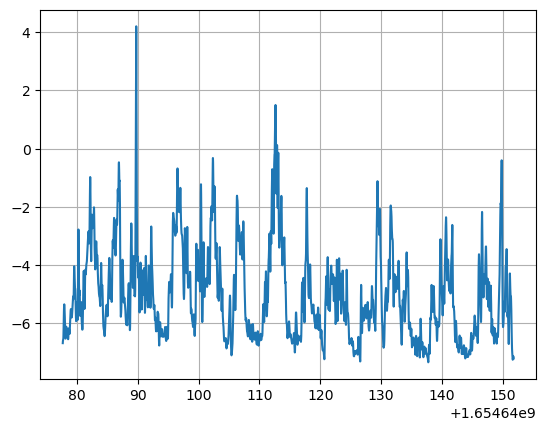

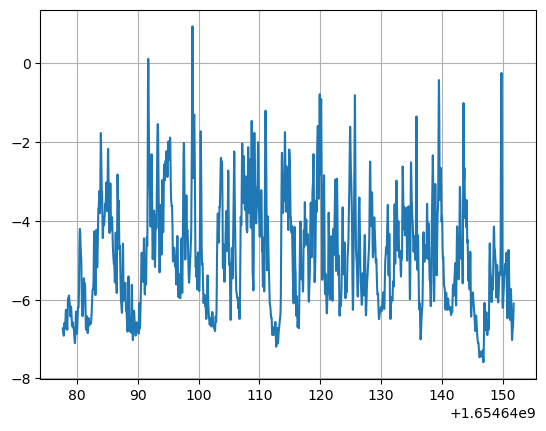

In [9]:
import pandas as pd
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data = pd.DataFrame(pd.read_pickle('./emg/S00_2.pkl'))

fc = 5
order = 4
to_read = ['myo_right', 'myo_left']

for side in to_read:
    for i, _ in data.iterrows():
        if i != 0:
            # Rectify channels
            row = abs(data.loc[i, side + '_readings'])
            times = data.loc[i, side + '_timestamps']
            
            # Low-pass filter 5 Hz
            fs = times.size / (times[-1]-times[0])

            nyq = 0.5 * fs
            wn = fc / nyq
            
            b, a = butter(order, wn, 'low', analog=False)
            filtered = filtfilt(b, a, row.T).T
            
            # Normalize in [-1, 1]
            scaler = MinMaxScaler(feature_range=(-1, 1))
            filtered = scaler.fit_transform(filtered)
            
            # Forearm activation
            activation = filtered.sum(1)
            
            # if row.size - filtered.size != 0:
            #     print(row.size-filtered.size)
            # if i == 1:
            #     plt.plot(times, row[:, 0], label='Originali')
            #     plt.plot(times, activation[:], label='Activation')
            #     plt.grid(True)
            #     plt.show()

In [2]:
from emg_extract import emg_adjust_features
import pandas as pd

data = emg_adjust_features('./emg/S05_2.pkl')
print(data.columns)
print(data.loc[25, :])

Index(['description', 'start', 'stop', 'myo_left_timestamps',
       'myo_left_readings', 'myo_right_timestamps', 'myo_right_readings'],
      dtype='object')
description                         Spread almond butter on a bread slice
start                                                   1655255609.629107
stop                                                    1655255631.253117
myo_left_timestamps     [1655255609.633106, 1655255609.637106, 1655255...
myo_left_readings       [0.3679144045045586, 0.17035645849585912, -0.0...
myo_right_timestamps    [1655255609.63211, 1655255609.63561, 165525560...
myo_right_readings      [-0.20421562091278234, -0.22565318221667985, -...
Name: 25, dtype: object


In [1]:
import pandas as pd

data = pd.DataFrame(pd.read_pickle('./action-net/ActionNet_test.pkl'))
print(data.columns)
x = 25
print(data.loc[25, 'file'])
print(data.loc[25, 'labels'])
print(data.loc[25, 'description'])

Index(['index', 'file', 'description', 'labels'], dtype='object')
25    S05_2.pkl
25    S07_1.pkl
25    S03_1.pkl
Name: file, dtype: object
25     Spread
25      Slice
25    Get/Put
Name: labels, dtype: object
25           Spread almond butter on a bread slice
25                                     Slice bread
25    Get items from refrigerator/cabinets/drawers
Name: description, dtype: object


In [21]:
from moviepy.editor import VideoFileClip, ImageClip
import cv2
import tqdm

clip = VideoFileClip("../S04-RGB/2022-06-14_16-38-43_S04_eye-tracking-video-world_frame.mp4")

for i, frame in tqdm.tqdm(enumerate(clip.iter_frames(fps=29.67))):
    cv2.imwrite(f'../S04-RGB/extracted/frame_{i:010d}.jpg', frame)


10406it [44:53,  3.86it/s]


KeyboardInterrupt: 

In [1]:
from utils.loaders import EmgDataset

d = EmgDataset('./emg', 'test')

print(d.__getitem__(1))

(myo_left_readings     [-6.375875930149694, -6.394405389739663, -6.41...
myo_right_readings    [-6.645921073805613, -6.642109698059149, -6.63...
Name: 1, dtype: object, 7)
